# Mengimport Library yang Dibutuhkan.

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Mengimport model yang sudah dilatih sebelumnya.

In [2]:
feature_bow = pickle.load(open("./model/feature-bow.p",'rb'))
model_nb = pickle.load(open('./model/model-nb.p', 'rb'))

d:\Kuliah\Semester 5\Aplikasi Web\Praktikum 9 rev 1\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Kuliah\Semester 5\Aplikasi Web\Praktikum 9 rev 1\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2.post1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Mengimport dataset yang diperlukan.

In [3]:
data_cleaned = pd.read_csv('./data/cleaned_comment_yt.csv')
data_cleaned.head()

,comment,cleaned_comment
0,Gibraaaann MANTAPKU🔥🔥🔥🔥,mantap
1,Pengen balik ke sini. Lihat orang2 yg dulu ng...,balik ke sini orang yg dulu ngalem bocil msh t...
2,Woi Tapera Tapera ok gas ok gas pretttt,ok gas ok gas pretttt
3,AkademisiRocky Gerung,akademisirocky
4,uustadzRockyvGerungprofDrAhliFilsapatnterkemuk...,uustadzrockyvgerungprofdrahlifilsapatnterkemukadi


# Membuat method untuk memprediksi sentimen.

In [4]:
def predict_sentiment(sent):
    text=str(sent)
    # feature extraction
    text_feature = feature_bow.transform([text])
    # predict
    return model_nb.predict(text_feature)[0]

# Menerapkan method predict_sentiment ke dalam data_cleaned pada kolom 'cleaned_comment'

In [5]:
data_cleaned['predicted_sentiment'] = data_cleaned.cleaned_comment.apply(predict_sentiment)

data_cleaned.head()

,comment,cleaned_comment,predicted_sentiment
0,Gibraaaann MANTAPKU🔥🔥🔥🔥,mantap,positive
1,Pengen balik ke sini. Lihat orang2 yg dulu ng...,balik ke sini orang yg dulu ngalem bocil msh t...,negative
2,Woi Tapera Tapera ok gas ok gas pretttt,ok gas ok gas pretttt,neutral
3,AkademisiRocky Gerung,akademisirocky,positive
4,uustadzRockyvGerungprofDrAhliFilsapatnterkemuk...,uustadzrockyvgerungprofdrahlifilsapatnterkemukadi,positive


# Menyimpan dataset yang telah diprediksi sentimennya ke dalam bentuk CSV.

In [6]:
data_cleaned.to_csv('./data/predicted_comment_yt.csv', index=False)

# Memvisualisasikan persebaran sentimen berdasarkan kuantitasnya.

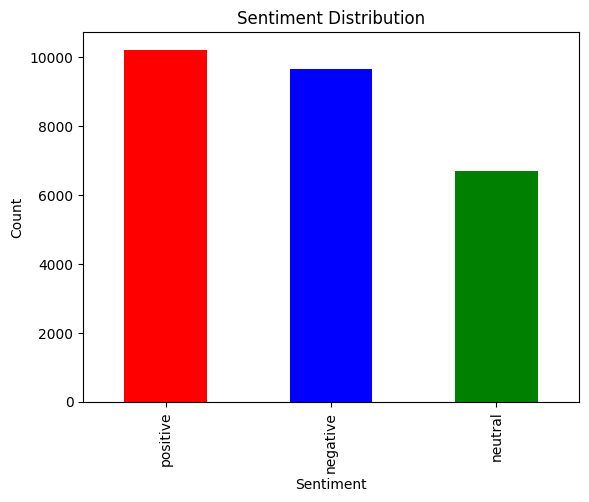

In [7]:
df = pd.read_csv('./data/predicted_comment_yt.csv')

sentiment_counts = df['predicted_sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Menyeimbangkan semua jumlah sentimen agar sama dengan jumlah sentimen paling sedikit.

In [8]:
min_count = sentiment_counts.min()

# Sample the minimum count of each sentiment
df_balanced = df.groupby('predicted_sentiment').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

print(df_balanced['predicted_sentiment'].value_counts())

predicted_sentiment
negative    6691
neutral     6691
positive    6691
Name: count, dtype: int64


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_100016\1667129359.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('predicted_sentiment').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


# Menyimpan dataset yang telah diseimbangkan ke dalam bentuk file CSV.

In [9]:
df_balanced.to_csv('./data/predicted_comment_balanced.csv', index=False)